# Lecture 6: Network Flow Models

## Contents
- [Transportation problem](#section1)
- [Project management](#section2)
- [Process flexibility](#section3)
    - [Model for a fixed demand](#subsection3.1)
    - [Evaluating dedicated system](#subsection3.2)
    - [Evaluating full flexible system](#subsection3.3)

## Transportation problem <a id="section1"></a>
Formulation of a general transporation problem:
\begin{equation}
\begin{split}
\min~ & \sum_{i=1}^m\sum_{j=1}^n c_{ij}x_{ij} \\
s.t. ~& \sum_{j=1}^nx_{ij}=a_i, ~ i = 1,...,m\\
& \sum_{i=1}^mx_{ij}=b_j, ~ j = 1,...,n\\
& x_{ij}\geq 0.
\end{split}
\end{equation}
<div class="alert alert-block alert-success">
<b>Example:</b> 
\begin{array}{rr} \hline
 &\text{Dallas} &\text{Atalanta} &\text{San Francisco} & \text{Phila.}   & Supply\\ \hline
\text{Cleveland} &8 &6 &10 &9 & 35 \\ 
\text{Chicago} &9 &12 &13 &7 & 50 \\ 
\text{Boston} &14 &9 &16 &5 & 40 \\ 
Demands &45 &20 &30 &30 & [125] \\ \hline
\end{array}
</div> 

In [2]:
from gurobipy import *
import numpy as np


#########Parameters Set-up############

#Objective coefficient: transportation cost from supply node i to demand node j
cost = np.array([[8, 6, 10, 9],
                [9, 12, 13, 7], 
                [14, 9, 16, 5]])


#supply and demand
supply = np.array([35, 50, 40])

demand = np.array([45, 20, 30, 30])

#From the cost matrix, extract the number of supply nodes: M and the number of demand nodes: N
M, N = cost.shape



#########Model Set-up###############

tp = Model("transportation")

# Creat variables
# addVars ( *indices, lb=0.0, ub=GRB.INFINITY, obj=0.0, vtype=GRB.CONTINUOUS, name="" )
x = tp.addVars(M, N)

# Set objective
tp.setObjective( quicksum(cost[i,j]*x[i,j] for i in range(M) for j in range(N)), GRB.MINIMIZE)

# Add supply constraints: 
tp.addConstrs(( quicksum(x[i,j] for j in range(N)) == supply[i] for i in range(M) ), "Supply")

# Add demand constraints: 
tp.addConstrs(( quicksum(x[i,j] for i in range(M)) == demand[j] for j in range(N) ), "Demand")

# Solving the model
tp.optimize()

#  Print optimal solutions and optimal value
for i in range(M):
    for j in range(N):
        print("\n Supply node %g to demand node %g amount: %g" % (i+1, j+1 , x[i,j].x))
    
print('Obj:', tp.objVal)


Optimize a model with 7 rows, 12 columns and 24 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+00, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 5e+01]
Presolve time: 0.13s
Presolved: 7 rows, 12 columns, 24 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.3000000e+02   1.200000e+02   0.000000e+00      0s
       3    1.0200000e+03   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.21 seconds
Optimal objective  1.020000000e+03

 Supply node 1 to demand node 1 amount: 0

 Supply node 1 to demand node 2 amount: 10

 Supply node 1 to demand node 3 amount: 25

 Supply node 1 to demand node 4 amount: 0

 Supply node 2 to demand node 1 amount: 45

 Supply node 2 to demand node 2 amount: 0

 Supply node 2 to demand node 3 amount: 5

 Supply node 2 to demand node 4 amount: 0

 Supply node 3 to demand node 1 amount: 0

 Supply node 3 to demand node 2 amount: 10

 Supply node 3 

## Project management <a id="section2"></a>
<div class="alert alert-block alert-success">
<b>Example:</b> The following table summarizes a project with 9 activities with the corresponding crashing information. 
  \begin{array}{rr} \hline
\text{Activity} &\text{Successors} &\text{Duration} &\text{Crash Cost} & \text{Crash Capacity}  \\ \hline
1 & 2    & 4 & 1 & 4  \\ 
2 & 3,4    & 1 & 0 & 0  \\ 
3 & 5    & 1 & 0 & 0 \\ 
4 & 6    & 1 & 2 & 1/2 \\ 
5 & 6,7    & 1 & 2 & 1/2\\ 
6 & 8 & 2 & 2 & 1\\ 
7 & 9    & 2 & 2 & 1/2  \\ 
8 & 9    & 1 & 0 & 0 \\ 
9 & - & 1 & 2 & 1/2 \\ 
\hline
\end{array}
</div> 

In [2]:

#########Parameters Set-up############

NODES = np.arange(1, 11)

print(NODES)

N_NODES = len(NODES)

duration = np.array([4,1,1,1,1,2,2,1,1,0])

cost = np.array([1,0,0,2,2,2,2,0,2,0])

capacity = np.array([4,0,0,0.5,0.5,1,0.5,0,0.5,0])

NODES, duration, cost, capacity = multidict( {NODES[i]: (duration[i], cost[i], capacity[i]) for i in range(N_NODES) })

ARCS = tuplelist([(1,2), (2,3), (2,4), (3,5), (4,6), (5,6), (5,7), (6,8), (7,9), (8,9), (9,10)])

print("-----------------------\n")
print("\n Nodes set is:", NODES)
print("\n The duration is:", duration)
print("\n The capacity is:", capacity)                                            
print("\n The arc set is: \n", ARCS)

N_ARCS = len(ARCS)

deadline = 7

[ 1  2  3  4  5  6  7  8  9 10]
-----------------------


 Nodes set is: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

 The duration is: {1: 4, 2: 1, 3: 1, 4: 1, 5: 1, 6: 2, 7: 2, 8: 1, 9: 1, 10: 0}

 The capacity is: {1: 4.0, 2: 0.0, 3: 0.0, 4: 0.5, 5: 0.5, 6: 1.0, 7: 0.5, 8: 0.0, 9: 0.5, 10: 0.0}

 The arc set is: 
 <gurobi.tuplelist (11 tuples, 2 values each):
 ( 1 , 2  )
 ( 2 , 3  )
 ( 2 , 4  )
 ( 3 , 5  )
 ( 4 , 6  )
 ( 5 , 6  )
 ( 5 , 7  )
 ( 6 , 8  )
 ( 7 , 9  )
 ( 8 , 9  )
 ( 9 , 10 )
>


In [3]:
#########Model Set-up###############

pm = Model("project_management")

# Creat variables
# the crashing decisions
x = pm.addVars(NODES, lb=0.0, ub=capacity)
# The starting time of each project
y = pm.addVars(NODES)

# Set objective
pm.setObjective( quicksum(cost[i]*x[i] for i in NODES), GRB.MINIMIZE)

# Add precedence constraints: 
pm.addConstrs(( y[i] - (y[j] + duration[j] - x[j]) >= 0 for (j, i) in ARCS ), "Precedence")

# Add deadline constraint: 
pm.addConstr(y[N_NODES] <= deadline, "Deadline")

# Solving the model
pm.optimize()

#  Print optimal solutions and optimal value
print("\n Crashing decisions:")
for i in NODES:
    print("\n The duration of activity %g is crashed by %g weeks;" % (i, x[i].x))
    
print("\n Activity starting time:")
for i in NODES:
    print("The starting time of activity %g is %g th week;"  % (i, y[i].x))
    
print('Obj:', pm.objVal)

Academic license - for non-commercial use only
Optimize a model with 12 rows, 20 columns and 34 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [5e-01, 4e+00]
  RHS range        [1e+00, 7e+00]
Presolve removed 6 rows and 11 columns
Presolve time: 0.09s
Presolved: 6 rows, 9 columns, 17 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   7.759250e+00   0.000000e+00      0s
       3    4.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.09 seconds
Optimal objective  4.000000000e+00

 Crashing decisions:

 The duration of activity 1 is crashed by 4 weeks;

 The duration of activity 2 is crashed by 0 weeks;

 The duration of activity 3 is crashed by 0 weeks;

 The duration of activity 4 is crashed by 0 weeks;

 The duration of activity 5 is crashed by 0 weeks;

 The duration of activity 6 is crashed by 0 weeks;

 The duration of activity 7 i

## Process flexibility <a id="section3"></a>
### Model for a fixed demand <a id="subsection3.1"></a>
Suppose the capacity at plant $i$ is $C_i$ and the demand for product $j$ is $D_j$. Then, the network formulation for maximizing sales given demands is:
\begin{equation}
\begin{split}
\max~ & \sum_{(i,j)\in A}x_{ij} \\
s.t. ~& \sum_{j:(i,j)\in A}x_{ij} \leq C_i\\
& \sum_{i:(i,j)\in A}x_{ij} \leq D_j\\
& x_{ij}\geq 0.
\end{split}
\end{equation}
We consider the following example.
<div class="alert alert-block alert-success">
<b>Example:</b> Consider the case with 6 plants and 6 products, and plant $i$ is able to produce only product $i$, $i=1,...,6$. The capacities and demands are all assumed to be $100$, i.e.,
\begin{equation}
        C_i = 100, ~i=1,...,6; \quad D_j=100, ~j=1,...,6.
\end{equation}
</div> 

In [4]:
from gurobipy import *
import numpy as np

#########Parameters Set-up for a Dedicated System and a Deterministic Demand############

#supply and demand
supply = np.array([100, 100, 100, 100, 100, 100])

demand = np.array([100, 100, 100, 100, 100, 100])

ARCS = tuplelist([(0,0), (1,1), (2,2), (3,3), (4,4), (5,5)])


N = len(supply)
M = len(demand)

print(ARCS)


<gurobi.tuplelist (6 tuples, 2 values each):
 ( 0 , 0 )
 ( 1 , 1 )
 ( 2 , 2 )
 ( 3 , 3 )
 ( 4 , 4 )
 ( 5 , 5 )
>


In [5]:
#########Model Set-up Using Function###############

def model_setup():
    
    m = Model("Process_Flexi")
    
    # number of weeks to offer price level i
    x = m.addVars(ARCS, name = "x")

    # set objective
    m.setObjective( quicksum(x[i,j] for (i,j) in ARCS), GRB.MAXIMIZE)

    # capcity constraint: 
    m.addConstrs( ( quicksum(x[i,j] for (i,j) in ARCS.select(i,'*')) <= supply[i] for i in range(N)), "capacity")

    # demand constraint: 
    m.addConstrs( ( quicksum(x[i,j] for (i,j) in ARCS.select('*',j)) <= demand[j] for j in range(M) ), "demand")
    
    #Supressing the optimization output
    m.setParam( 'OutputFlag', False )
    
    return m


In [6]:
# setup the model
m = model_setup()

# Solving the model
m.optimize()

#  Print optimal solutions and optimal value
print("\n Optimal solution:")
for v in m.getVars():
    print(v.VarName, v.x)

print("\n Optimal profit:")
print('Obj:', m.objVal)



 Optimal solution:
x[0,0] 100.0
x[1,1] 100.0
x[2,2] 100.0
x[3,3] 100.0
x[4,4] 100.0
x[5,5] 100.0

 Optimal profit:
Obj: 600.0


### Evaluating dedicated system <a id="subsection3.2"></a>
Now we consider the problem of how to evaluate the average sales if the demands for the products are random. Suppose the demand follows a multivariate normal distribution truncated above zero. That is, $D_j=\max\{X_j,0\}$ and 
\begin{equation}
        (X_1,...,X_6) \sim \mathcal{N}(\mu,\Sigma),
\end{equation}
where $(\mu_1,...,\mu_6)$ is the vector means and $\Sigma$ is the covariance matrix. We consider the following parameters.
<div class="alert alert-block alert-success">
The random variables $X_i, i=1,...6$ are identical and independent (i.i.d.) with mean $100$ and standard deviation $30$, i.e., 
\begin{equation}
        \mu_i = 100, ~i=1,...,6,
\end{equation}
and
\begin{equation}
        \Sigma = 
        \left[
        \begin{array}{cccccc}
        900 & 0 & 0 & 0 & 0 & 0 \\ 
        0 & 900 & 0 & 0 & 0 & 0 \\ 
        0 & 0 & 900 & 0 & 0 & 0 \\
        0 & 0 & 0 & 900 & 0 & 0 \\
        0 & 0 & 0 & 0 & 900 & 0 \\
        0 & 0 & 0 & 0 & 0 & 900 \\
        \end{array}
        \right]
\end{equation}
We randomly sample $1000$ samples from the above distribution.
</div> 


In [7]:
#########Evaluate the Dedicated System for Random Demand############
ARCS = tuplelist([(0,0), (1,1), (2,2), (3,3), (4,4), (5,5)])


#mean of the demand
mean = np.array([100, 100, 100, 100, 100, 100])

#covariance matrix of the demand (independent with s.d. 30)
cov = np.array([[900, 0, 0, 0, 0, 0], 
                [0, 900, 0, 0, 0, 0],
                [0, 0, 900, 0, 0, 0],
                [0, 0, 0, 900, 0, 0],
                [0, 0, 0, 0, 900, 0],
                [0, 0, 0, 0, 0, 900]])

Sample_Size = 1000

sales_dedicate = np.zeros(Sample_Size)


for i in range(Sample_Size):
    
    # demand is sampled from multivariate normal distribution with mean and cov (and truncated above zero)
    demand = np.maximum(np.random.multivariate_normal(mean, cov), 0)
    
    # setup the model again
    m = model_setup()

    # solving the model
    m.optimize()
    
    # store the maximum sales for the i-th sample
    sales_dedicate[i] = m.objVal

# compute the average of maximum sales
avg_sales_dedicate = np.average(sales_dedicate)    

print('Average maximum sales for dedicated system:', avg_sales_dedicate)


Average maximum sales for dedicated system: 528.0838163796561


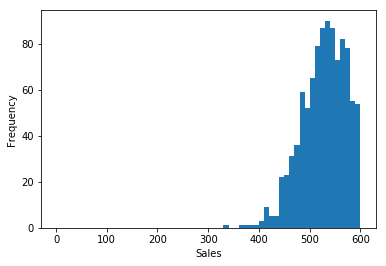

In [9]:
# visiualizing the sales over all samples
import matplotlib.pyplot as plt

plt.hist(sales_dedicate, bins = 60, range = (0, 600))
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

### Evaluating full flexible system <a id="subsection3.3"></a>
The setting is the same as the one for [Evaluating dedicated system](#subsection2.2), except the underlying graph becomes a complete bipartite graph.

In [10]:
#########Evaluate the Full Flexible System for Random Demand############
ARCS = tuplelist([(0,0), (0,1), (0,2), (0,3), (0,4), (0,5),
                  (1,0), (1,1), (1,2), (1,3), (1,4), (1,5),
                  (2,0), (2,1), (2,2), (2,3), (2,4), (2,5),
                  (3,0), (3,1), (3,2), (3,3), (3,4), (3,5),
                  (4,0), (4,1), (4,2), (4,3), (4,4), (4,5),
                  (5,0), (5,1), (5,2), (5,3), (5,4), (5,5)])


sales_full = np.zeros(Sample_Size)


for i in range(Sample_Size):
    
    # demand is sampled from multivariate normal distribution with mean and cov (and truncated above zero)
    demand = np.maximum(np.random.multivariate_normal(mean, cov), 0)
    
    # setup the model again
    m = model_setup()

    # solving the model
    m.optimize()
    
    # store the maximum sales for the i-th sample
    sales_full[i] = m.objVal

# compute the average of maximum sales
avg_sales_full = np.average(sales_full)    

print('Average maximum sales for full flexible system:', avg_sales_full)

Average maximum sales for full flexible system: 571.5887580709361


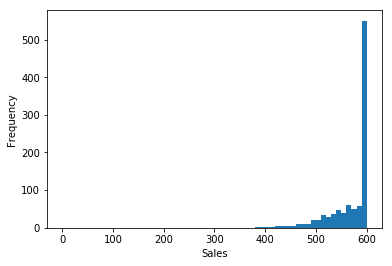

In [11]:
# visiualizing the sales over all samples

plt.hist(sales_full, bins = 60, range = (0, 600))
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()